METHODOLOGY

IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score

DATA COLLECTION & LOADING

In [2]:
df = pd.read_csv("global-data-on-sustainable-energy (1).csv")

print("Original Data Shape:", df.shape)
print(df.head())

Original Data Shape: (3649, 21)
        Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                        

DATA CLEANING & PREPROCESSING

In [ ]:
missing_threshold = 0.5
df = df.loc[:, df.isnull().mean() < missing_threshold]

for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].median())

for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].fillna(df[col].mode()[0])

drop_cols = ["Country", "Country Name", "country", "Entity", "Code", "Year"]
df = df.drop(columns=[c for c in drop_cols if c in df.columns], errors="ignore")

print("Cleaned Data Shape:", df.shape)

Cleaned Data Shape: (3649, 17)


FEATURE ENGINEERING

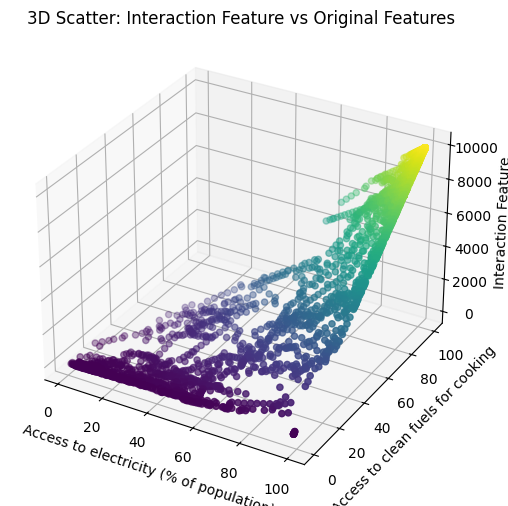

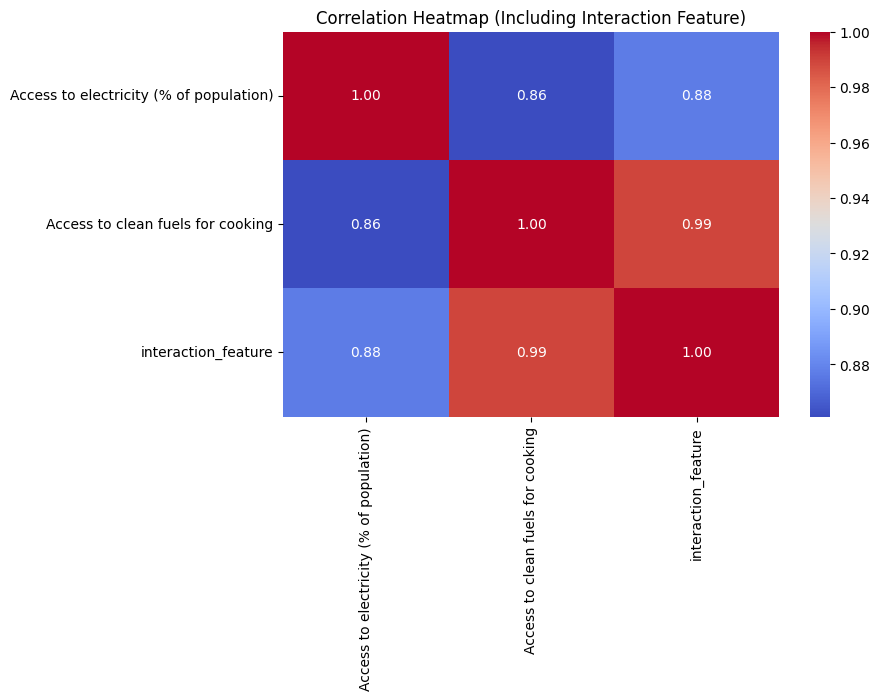

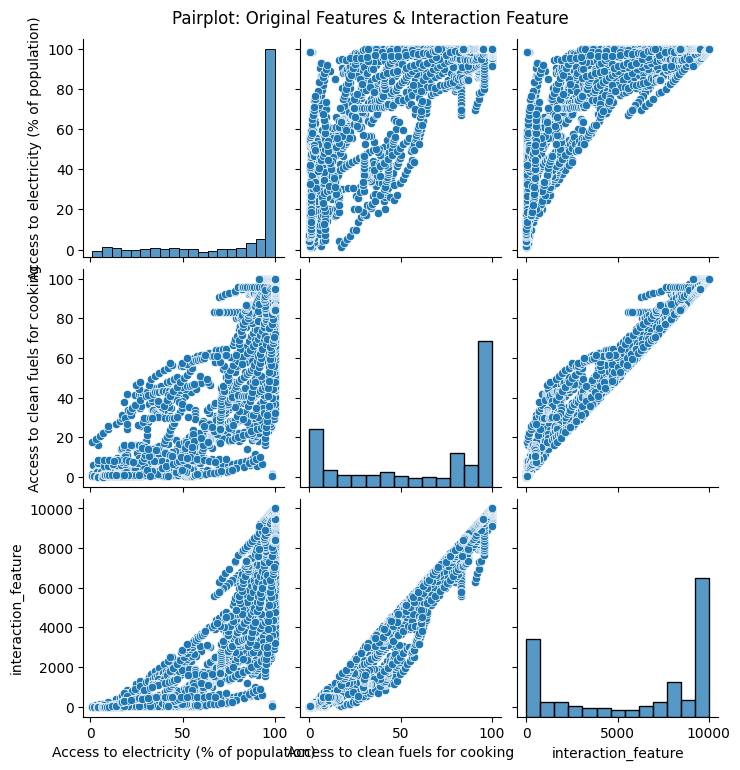

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Identify columns
col1 = numeric_cols[0]
col2 = numeric_cols[1]

# ✅ 1. 3D Scatter Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[col1], df[col2], df["interaction_feature"], c=df["interaction_feature"], cmap='viridis')
ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.set_zlabel("Interaction Feature")
ax.set_title("3D Scatter: Interaction Feature vs Original Features")
plt.show()

# ✅ 2. Correlation heatmap (with interaction feature)
plt.figure(figsize=(8, 5))
sns.heatmap(df[[col1, col2, "interaction_feature"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Including Interaction Feature)")
plt.show()

# ✅ 3. Pairplot
sns.pairplot(df[[col1, col2, "interaction_feature"]])
plt.suptitle("Pairplot: Original Features & Interaction Feature", y=1.02)
plt.show()


DEFINE FEATURES & TARGET

In [17]:
target_col = numeric_cols[0]
X = df.drop(columns=[target_col])
y = df[target_col]

DATA NORMALIZATION

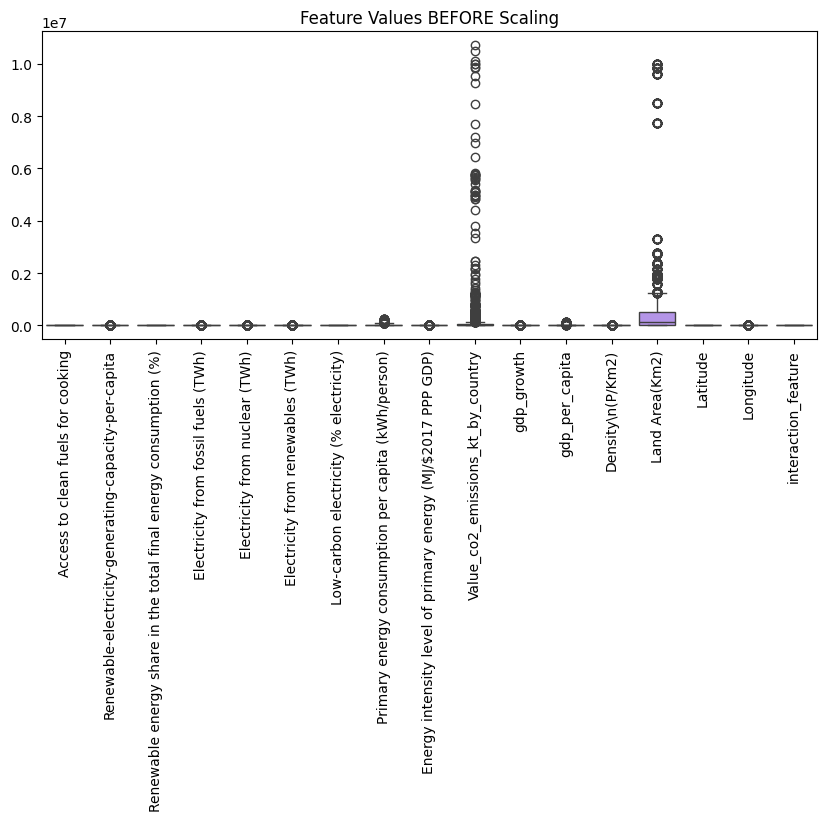

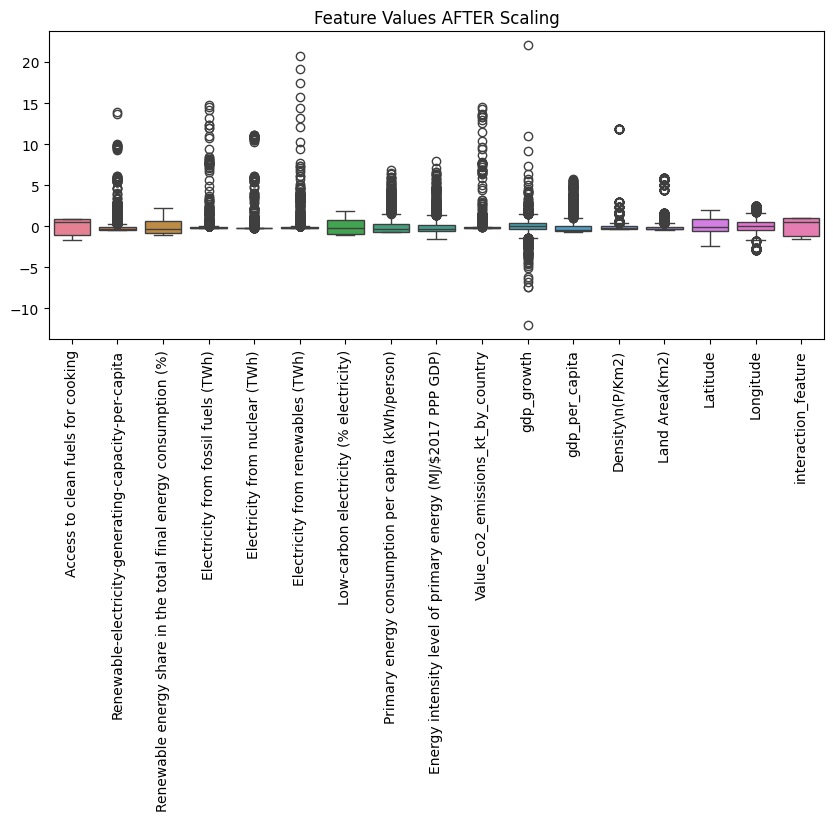

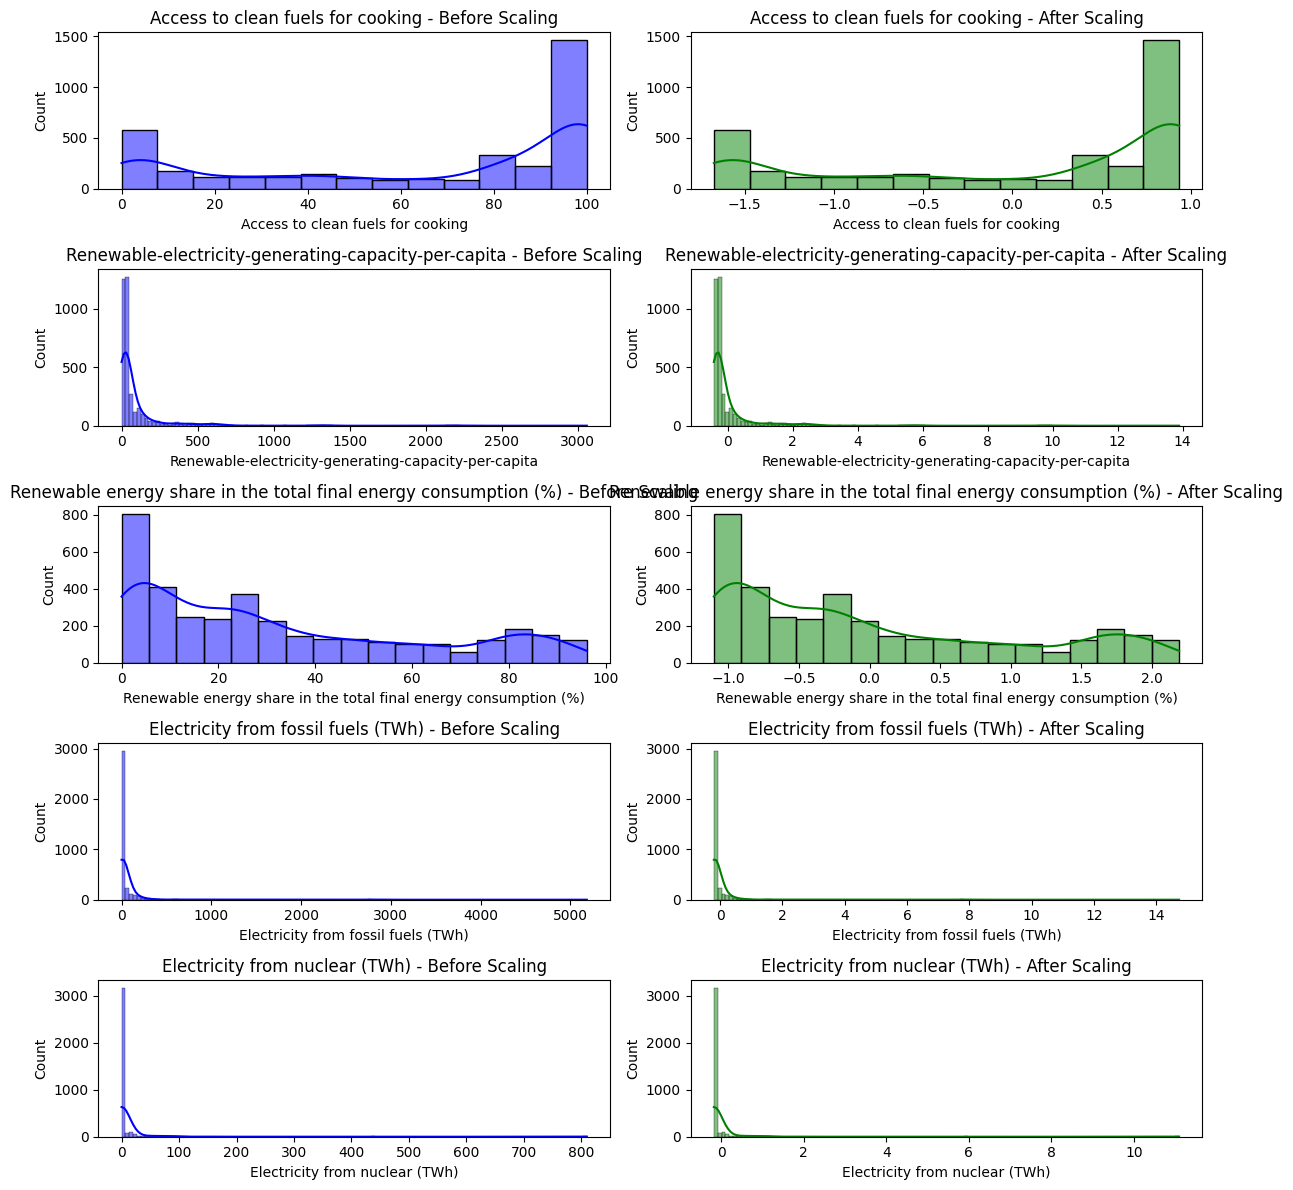

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# ====== CLEANING ======
X_clean = X.copy()

for col in X_clean.columns:
    if X_clean[col].dtype == object: 
        X_clean[col] = X_clean[col].str.replace(",", "", regex=False) 
        try:
            X_clean[col] = X_clean[col].astype(float)
        except ValueError:
            pass  

# ====== BEFORE SCALING ======
plt.figure(figsize=(10, 4))
sns.boxplot(data=X_clean)
plt.title("Feature Values BEFORE Scaling")
plt.xticks(rotation=90)
plt.show()

# ====== SCALING ======
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_clean.columns)

# ====== AFTER SCALING ======
plt.figure(figsize=(10, 4))
sns.boxplot(data=X_scaled_df)
plt.title("Feature Values AFTER Scaling")
plt.xticks(rotation=90)
plt.show()

# ====== HISTOGRAM COMPARISON (first 5 features) ======
fig, axes = plt.subplots(5, 2, figsize=(12, 12))
for i, col in enumerate(X_clean.columns[:5]):
    sns.histplot(X_clean[col], ax=axes[i, 0], kde=True, color='blue')
    axes[i, 0].set_title(f"{col} - Before Scaling")

    sns.histplot(X_scaled_df[col], ax=axes[i, 1], kde=True, color='green')
    axes[i, 1].set_title(f"{col} - After Scaling")

plt.tight_layout()
plt.show()



TRAIN/TEST SPLIT

Training samples: 2919
Testing samples: 730


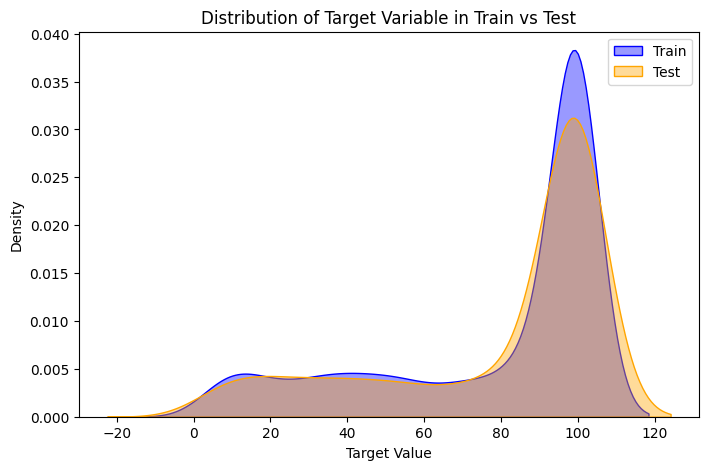

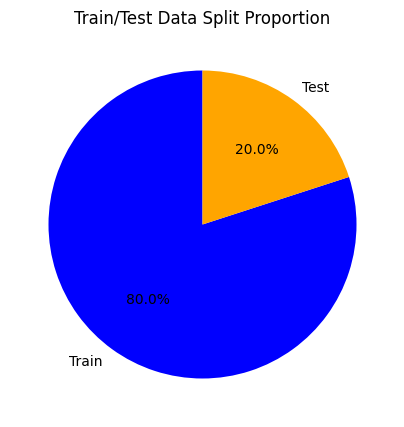

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check split sizes
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

# Visualize distribution of target variable in train vs test
plt.figure(figsize=(8, 5))
sns.kdeplot(y_train, label="Train", fill=True, color="blue", alpha=0.4)
sns.kdeplot(y_test, label="Test", fill=True, color="orange", alpha=0.4)
plt.title("Distribution of Target Variable in Train vs Test")
plt.xlabel("Target Value")
plt.ylabel("Density")
plt.legend()
plt.show()

# Optional: Pie chart of train/test proportion
sizes = [len(y_train), len(y_test)]
labels = ["Train", "Test"]
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, colors=["blue", "orange"])
plt.title("Train/Test Data Split Proportion")
plt.show()


 MODEL DEVELOPMENT & TRAINING

C:\Users\Sahil\AppData\Local\Temp\ipykernel_15172\732385551.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="R² Score", y="Model", data=performance_df, palette="viridis")


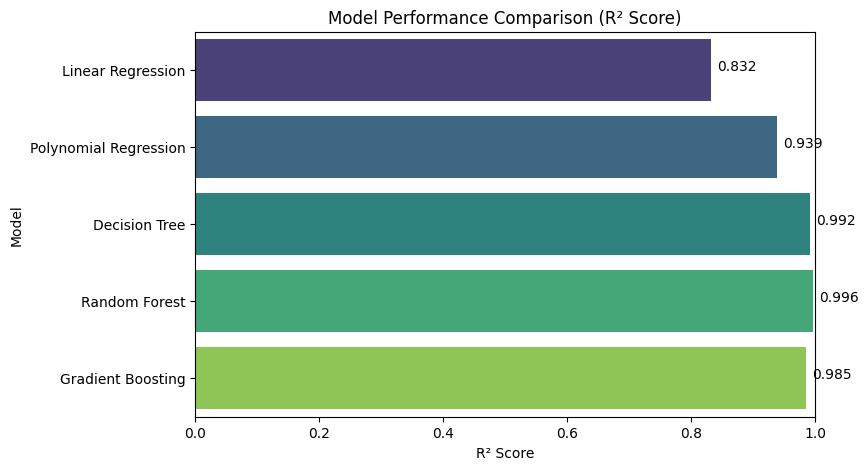

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

models = {}
scores = {}

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
scores["Linear Regression"] = r2_score(y_test, y_pred_lin)

# Polynomial Regression (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)
scores["Polynomial Regression"] = r2_score(y_test, y_pred_poly)

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
scores["Decision Tree"] = r2_score(y_test, y_pred_dt)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
scores["Random Forest"] = r2_score(y_test, y_pred_rf)

# Gradient Boosting
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
scores["Gradient Boosting"] = r2_score(y_test, y_pred_gbr)

plt.figure(figsize=(8, 5))
sns.barplot(x="R² Score", y="Model", data=performance_df, palette="viridis")

# Add score labels on bars
for index, value in enumerate(performance_df["R² Score"]):
    plt.text(value + 0.01, index, f"{value:.3f}")

plt.title("Model Performance Comparison (R² Score)")
plt.xlim(0, 1)  # assuming scores between 0 and 1
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.show()

PERFORMANCE DATAFRAME

In [13]:
performance_df = pd.DataFrame(list(scores.items()), columns=["Model", "R² Score"])
print(performance_df)

                   Model  R² Score
0      Linear Regression  0.832324
1  Polynomial Regression  0.938783
2          Decision Tree  0.991718
3          Random Forest  0.996257
4      Gradient Boosting  0.984934


VISUALIZATION

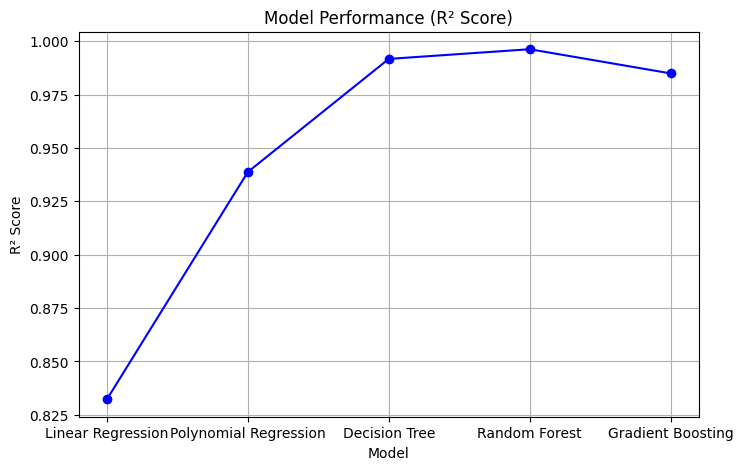

In [10]:
plt.figure(figsize=(8,5))
plt.plot(performance_df["Model"], performance_df["R² Score"], marker='o', linestyle='-', color='b')
plt.title("Model Performance (R² Score)")
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.grid(True)
plt.show()

ALOGRITHMS USED

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA

1. LINEAR REGRESSION

R² Score: 0.07725680999269224


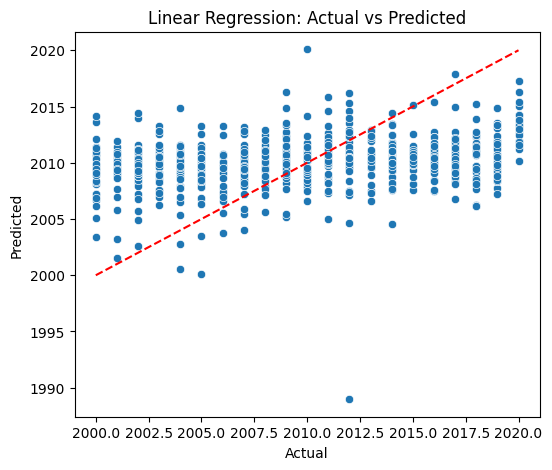

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load data
df = pd.read_csv("global-data-on-sustainable-energy (1).csv")

# Convert numeric-looking strings to floats
for col in df.columns:
    if df[col].dtype == object:
        df[col] = df[col].str.replace(",", "", regex=False)
        try:
            df[col] = df[col].astype(float)
        except:
            pass

# Fill missing values
df.fillna(0, inplace=True)

# Keep only numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Pick target column (first numeric column for now)
target_col = numeric_cols[0]  # You can change this to the column you want to predict

# Features (drop target column) and Target
X = df[numeric_cols].drop(columns=[target_col])
y = df[target_col]

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Score
print("R² Score:", r2_score(y_test, y_pred))

# Graph
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


2. POLYNOMIAL REGRESSION

R² Score: 0.2641597489530123


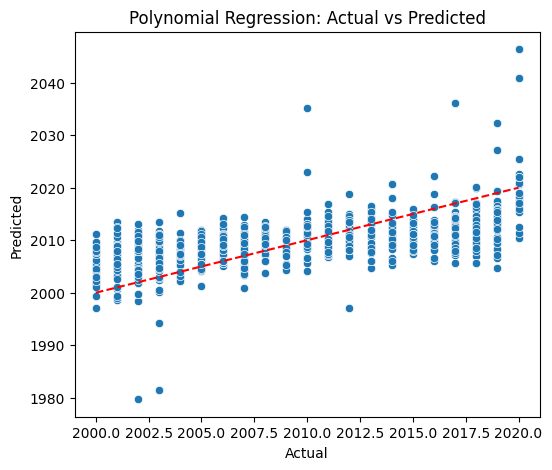

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_pred_poly = model_poly.predict(X_test_poly)

print("R² Score:", r2_score(y_test, y_pred_poly))

plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_pred_poly)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Polynomial Regression: Actual vs Predicted")
plt.show()


3. DESICION TREE REGRESSOR

R² Score: 0.5669738688023562


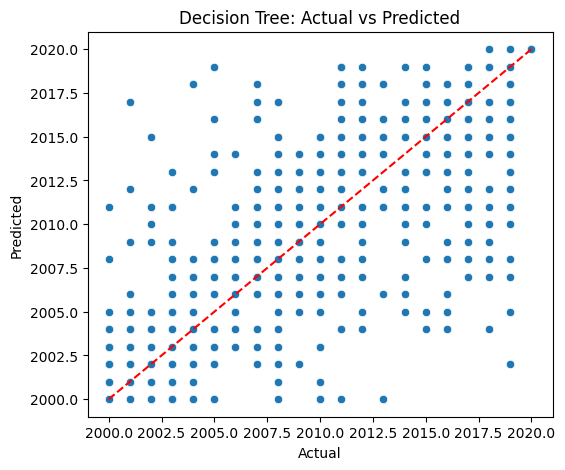

In [27]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred_dt))

plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_pred_dt)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Decision Tree: Actual vs Predicted")
plt.show()


4. RANDOM FOREST REGRESSOR

R² Score: 0.8002499136091337


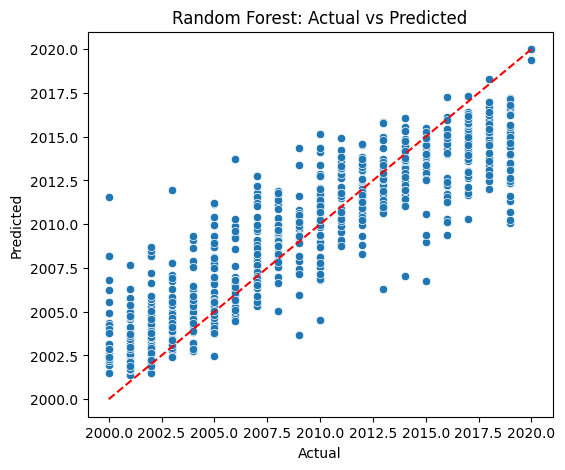

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred_rf))

plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random Forest: Actual vs Predicted")
plt.show()


5. GRADIENT BOOSTING REGRESSOR

R² Score: 0.5588874183579511


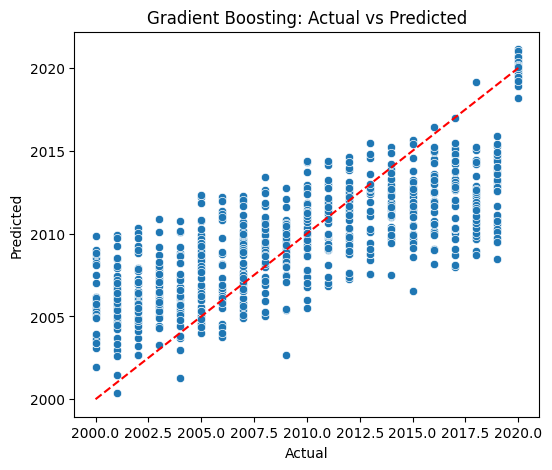

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred_gbr))

plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_pred_gbr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Gradient Boosting: Actual vs Predicted")
plt.show()


6. K-MEANS CLUSTERING

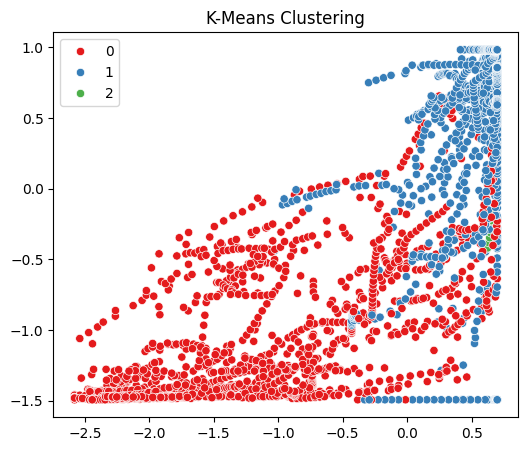

In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df["Cluster"] = clusters

plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette="Set1")
plt.title("K-Means Clustering")
plt.show()


7. NEURAL NETWORK (MLP)

c:\Users\Sahil\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


R² Score: -20.255830529726875


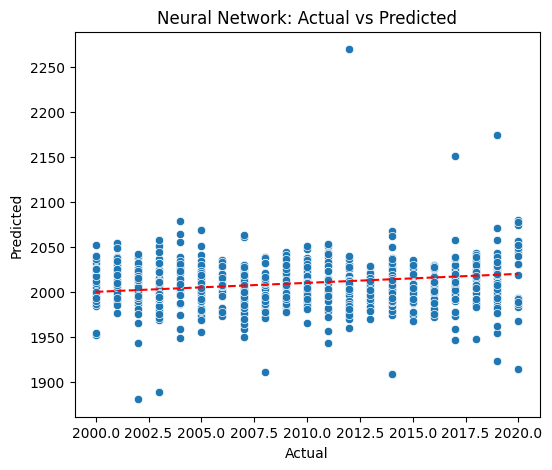

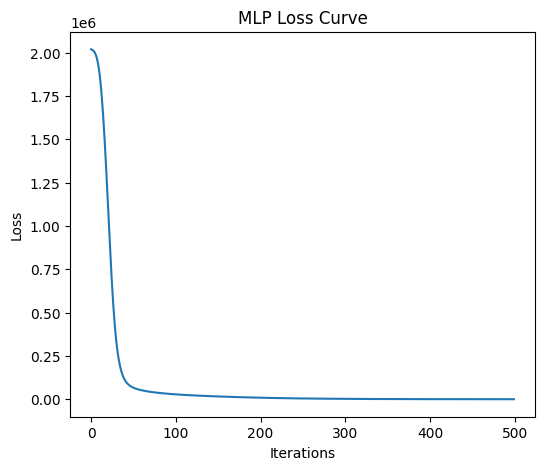

In [31]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred_mlp))

plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_pred_mlp)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Neural Network: Actual vs Predicted")
plt.show()

# Loss Curve
if hasattr(mlp, "loss_curve_"):
    plt.figure(figsize=(6, 5))
    plt.plot(mlp.loss_curve_)
    plt.title("MLP Loss Curve")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()
